**TikTok Video Content Classification**
--

Welcome to the TikTok Video Content Classification project! This repository contains the analysis and machine learning model development aimed at classifying TikTok video content as either a claim or an opinion. The goal is to enhance the moderation process and reduce the backlog of user reports by automating content classification.

**Project Background**
-

TikTok is a leading social media platform in the short-form video industry, operating since 2016 with a business model centered around user-generated content and advertising revenue. The primary objective is to improve content moderation efficiency to maintain community standards and enhance user experience.

**Key Business Metrics:**
-

- Total Videos Analyzed: 19,382

- Engagement Metrics: Views, Likes, Comments, Shares, Downloads

- Author Status: Verified, Unverified, Banned, Active, Under Review

**Data Structure and Initial Checks**
-

This dataset only contains one table, and the discription of this table is as follow:


[EDR diagram]


**Executive Summary**
-

**Overview of Findings**

The analysis reveals that claim videos receive significantly higher engagement compared to opinion videos, with unverified accounts generating more views on average than verified accounts. Additionally, videos from banned authors exhibit exceptionally high engagement levels, particularly within the claim category. These insights suggest that engagement metrics are more closely related to the content type (claim vs. opinion) rather than the author's verification or ban status.

**Insights Deep Dive**
-

**1. Classification Accuracy**
- `Main Insight 1`: The model successfully classifies video with an accuracy of ~99%, effectively distinguishing between claims and opnions.

- `Main Insight 2`: The model achieved a precision of 100% and a recall of nearly 100% for claim videos, meaning all videos predicted as claims are actual claims, with almost all true claims correctly identified.

- `Main Insight 3`: The engagement metrics are solely related to the claim status of a video, instead of the author's status. 

[Diagram]

**2. Engagement Patterns by Content Type**
- `Main Insight 1`: Claim videos have a higher mean and median number of views compared to opinion videos.

- `Main Insight 2`: Likes, comments, and shares are significantly higher for claim videos, indicating greater user interaction.

- `Main Insight 3`: Engagement levels are strongly correlated with claim status, regardless of the author's verification or ban status.

- `Main Insight 4`: Opinion videos under review receive more comments, likes, and shares, suggesting that while they are engaging, they do not violate community guidelines.

**3. Author Status Impact on Engagement**

- `Main Insight 1`: Banned authors' claim videos have the highest engagement levels, surpassing those of active and under-review authors.

- `Main Insight 2`: Verified accounts generally receive more consistent engagement, but unverified accounts outperform them in view counts.

- `Main Insight 3`: The discrepancy in engagement between banned and active authors highlights potential issues with content that leads to bans.

- `Main Insight 4`: Engagement patterns suggest that users are more drawn to content from banned authors, possibly due to controversial or high-impact content.



In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [25]:
data = pd.read_csv('data/tiktok_dataset.csv')

In [26]:
data.head(5)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [28]:
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [29]:
data = data.dropna(axis=0)

In [30]:
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19084.000000,1.908400e+04,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9542.500000,5.624840e+09,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5509.220604,2.537030e+09,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4771.750000,3.425100e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9542.500000,5.609500e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14313.250000,7.840823e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19084.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [31]:
data['claim_status'].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

In [32]:
claims = data[data['claim_status'] == 'claim']
print('Mean view count claims:', claims['video_view_count'].mean())
print('Median view count claims:', claims['video_view_count'].median())

Mean view count claims: 501029.4527477102
Median view count claims: 501555.0


In [33]:
opinions = data[data['claim_status'] == 'opinion']
print('Mean view count opinions:', opinions['video_view_count'].mean())
print('Median view count opinions:', opinions['video_view_count'].median())

Mean view count opinions: 4956.43224989447
Median view count opinions: 4953.0


Notes: The mean and the median within each claim category are close to one another, but there is a vast discrepancy between view counts for videos labeled as claims and videos labeled as opinions.

In [34]:
data.groupby(['claim_status', 'author_ban_status']).count()[['#']]

#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

Text(0.5, 1.0, 'Claim status by author ban status - counts')

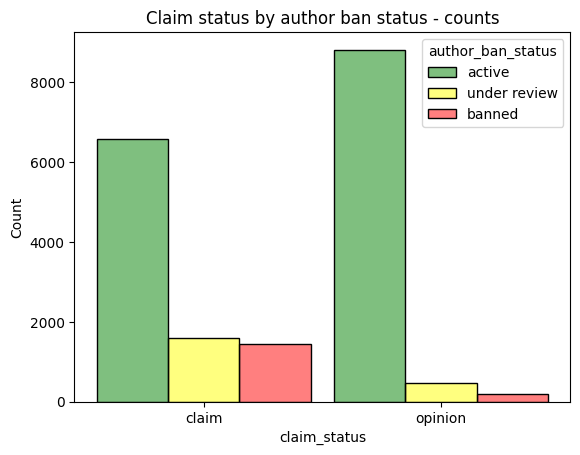

In [35]:
sns.histplot(data=data,
            x='claim_status',
            hue='author_ban_status',
            multiple='dodge',
            hue_order=['active','under review','banned'],
            palette={'active':'green','under review':'yellow','banned':'red'},
            alpha=0.5,
            shrink=0.9)
plt.title('Claim status by author ban status - counts')

*Notes*
There are many more claim videos with banned authors than there are opinion videos with banned authors. This could mean a number of things, including the possibilities that:
* Claim videos are more strictly policed than opinion videos
* Authors must comply with a stricter set of rules if they post a claim than if they post an opinion

Also, it should be noted that there's no way of knowing if claim videos are inherently more likely than opinion videos to result in author bans, or if authors who post claim videos are more likely to post videos that violate terms of service.

In [36]:
data.groupby(['author_ban_status']).agg(
    {'video_view_count': ['mean', 'median'],
     'video_like_count': ['mean', 'median'],
     'video_share_count': ['mean', 'median']})

video_view_count           video_like_count            \
                              mean    median             mean    median   
author_ban_status                                                         
active               215927.039524    8616.0     71036.533836    2222.0   
banned               445845.439144  448201.0    153017.236697  105573.0   
under review         392204.836399  365245.5    128718.050339   71204.5   

                  video_share_count           
                               mean   median  
author_ban_status                             
active                 14111.466164    437.0  
banned                 29998.942508  14468.0  
under review           25774.696999   9444.0

In [37]:
ban_status_counts = data.groupby(['author_ban_status']).median(
    numeric_only=True).reset_index()

ban_status_counts

,author_ban_status,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,active,10809.0,5.616492e+09,33.0,8616.0,2222.0,437.0,28.0,5.0
1,banned,5288.0,5.571981e+09,32.0,448201.0,105573.0,14468.0,892.0,209.0
2,under review,6129.5,5.607722e+09,31.0,365245.5,71204.5,9444.0,610.5,136.5


/var/folders/32/v798rz512835jj5s2_dh23rw0000gn/T/ipykernel_7067/1434659528.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ban_status_counts,


Text(0.5, 1.0, 'Median view count by ban status')

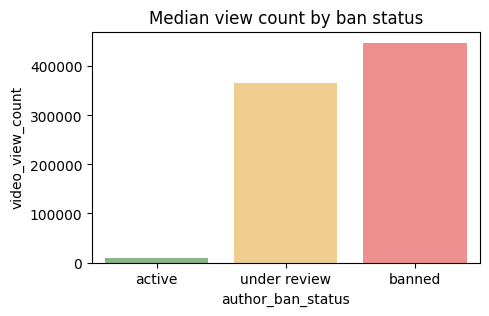

In [38]:
fig = plt.figure(figsize=(5,3))
sns.barplot(data=ban_status_counts,
            x='author_ban_status',
            y='video_view_count',
            order=['active', 'under review', 'banned'],
            palette={'active':'green', 'under review':'orange', 'banned':'red'},
            alpha=0.5)
plt.title('Median view count by ban status')

In [39]:
data.groupby('claim_status')['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

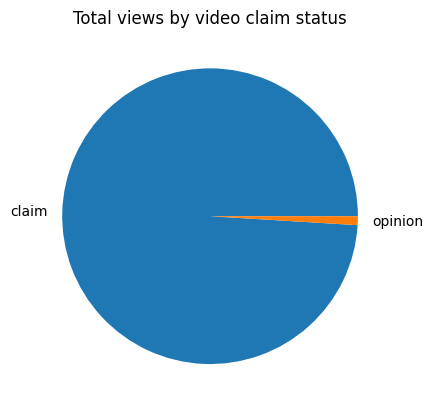

In [40]:
# The total views by claim status
plt.pie(data.groupby('claim_status')['video_view_count'].sum(), labels=['claim', 'opinion'])
plt.title('Total views by video claim status')
plt.show()

In [41]:
data.groupby(['author_ban_status']).median(numeric_only=True)[
    ['video_share_count']]

,video_share_count
author_ban_status,
active,437.0
banned,14468.0
under review,9444.0


Banned authors have a median share count that's 33 times the median share count of active authors

In [42]:
data.groupby(['author_ban_status']).agg(
    {'video_view_count': ['count', 'mean', 'median'],
     'video_like_count': ['count', 'mean', 'median'],
     'video_share_count': ['count', 'mean', 'median']
     })

video_view_count                          video_like_count  \
                             count           mean    median            count   
author_ban_status                                                              
active                       15383  215927.039524    8616.0            15383   
banned                        1635  445845.439144  448201.0             1635   
under review                  2066  392204.836399  365245.5             2066   

                                           video_share_count                \
                            mean    median             count          mean   
author_ban_status                                                            
active              71036.533836    2222.0             15383  14111.466164   
banned             153017.236697  105573.0              1635  29998.942508   
under review       128718.050339   71204.5              2066  25774.696999   

                            
                    median  
author_ban_status           
active               437.0  
banned             14468.0  
under review        9444.0

* Banned authors and those under review get far more views, likes, and shares than active authors.
* In most groups, the mean is much greater than the median, which indicates that there are some videos with very high engagement counts.

In [43]:
view_analyze = data.copy()
# Create a likes_per_view column
view_analyze['likes_per_view'] = data['video_like_count'] / data['video_view_count']

# Create a comments_per_view column
view_analyze['comments_per_view'] = data['video_comment_count'] / data['video_view_count']

# Create a shares_per_view column
view_analyze['shares_per_view'] = data['video_share_count'] / data['video_view_count']

In [44]:
view_analyze.groupby(['claim_status', 'author_ban_status']).agg(
    {'likes_per_view': ['count', 'mean', 'median'],
     'comments_per_view': ['count', 'mean', 'median'],
     'shares_per_view': ['count', 'mean', 'median']})

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view                      \
                                           count      mean    median   
claim_status author_ban_status                                         
claim        active                         6566  0.001393  0.000776   
             banned                         1439  0.001377  0.000746   
             under review                   1603  0.001367  0.000789   
opinion      active                         8817  0.000517  0.000252   
             banned                          196  0.000434  0.000193   
             under review                    463  0.000536  0.000293   

                               shares_per_view                      
                                         count      mean    median  
claim_status author_ban_status                                      
claim        active                       6566  0.065456  0.049279  
             banned                       1439  0.067893  0.051606  
             under review                 1603  0.065733  0.049967  
opinion      active                       8817  0.043729  0.032405  
             banned                        196  0.040531  0.030728  
             under review                  463  0.044472  0.035027

**Notes**
- We know that videos by banned authors and those under review tend to get far more views, likes, and shares than videos by non-banned authors. However, *when a video does get viewed*, its engagement rate is less related to author ban status and more related to its claim status.

- Also, we know that claim videos have a higher view rate than opinion videos, but this tells us that claim videos also have a higher rate of likes on average, so they are more favorably received as well. Furthermore, they receive more engagement via comments and shares than opinion videos.

- Note that for claim videos, banned authors have slightly higher likes/view and shares/view rates than active authors or those under review. However, for opinion videos, active authors and those under review both get higher engagement rates than banned authors in all categories.

Find Outliers
---

**video_duration_sec**

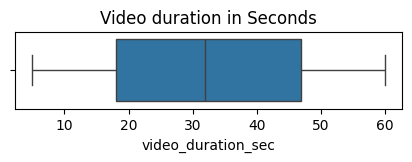

In [45]:
plt.figure(figsize=(5,1))
plt.title('Video duration in Seconds')
sns.boxplot(x=data['video_duration_sec'])
plt.show()

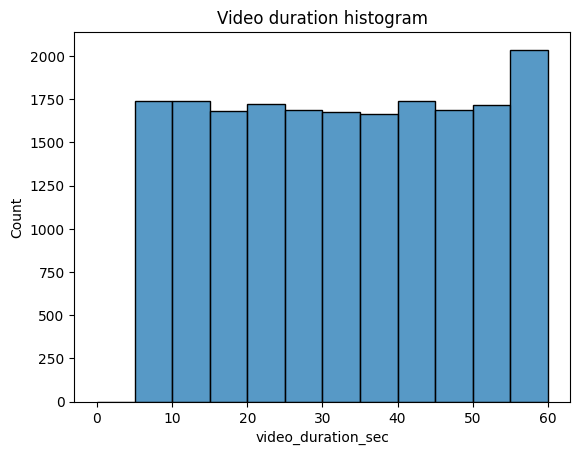

In [46]:
sns.histplot(data['video_duration_sec'], bins=range(0,61,5))
plt.title('Video duration histogram')
plt.show()

**video_view_count**

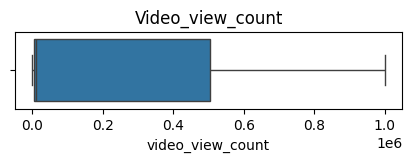

In [47]:
plt.figure(figsize=(5,1))
plt.title('Video_view_count')
sns.boxplot(x=data['video_view_count'])
plt.show()

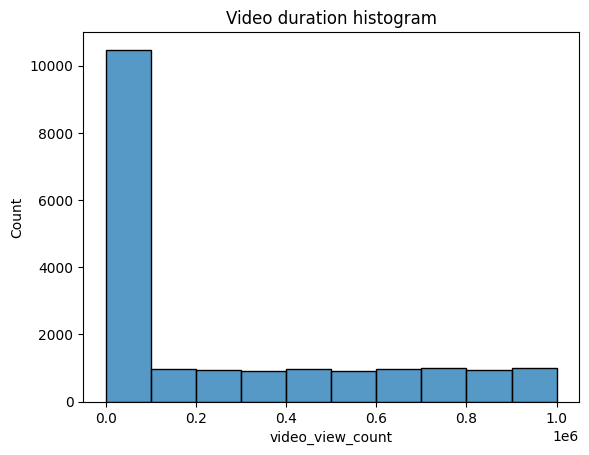

In [48]:
sns.histplot(data['video_view_count'], bins=range(0,10**6+1,10**5))
plt.title('Video duration histogram')
plt.show()

**video_like_count**

<Axes: title={'center': 'video_like_count'}, xlabel='video_like_count'>

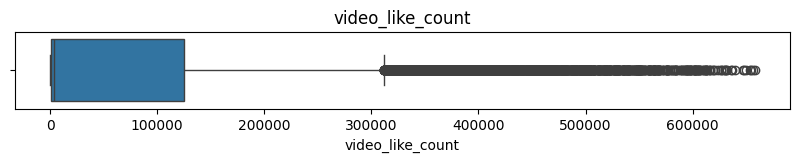

In [49]:
plt.figure(figsize=(10,1))
plt.title('video_like_count')
sns.boxplot(x=data['video_like_count'])

Text(0.5, 1.0, 'Video like count histogram')

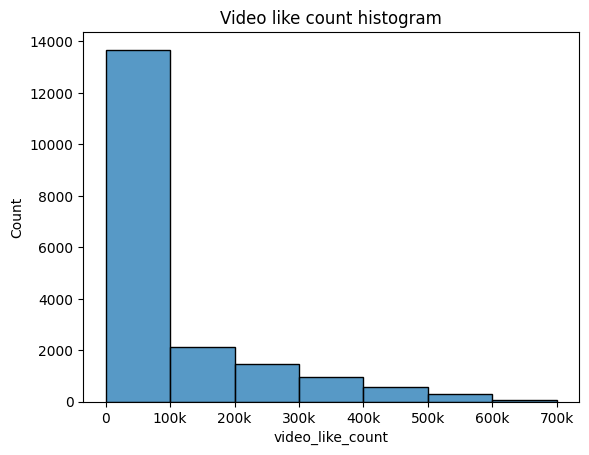

In [50]:
ax = sns.histplot(data['video_like_count'], bins=range(0,(7*10**5+1),10**5))
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
ax.set_xticks(range(0,7*10**5+1,10**5), labels=labels)
plt.title('Video like count histogram')

**video_comment_count**

<Axes: title={'center': 'video_comment_count'}, xlabel='video_comment_count'>

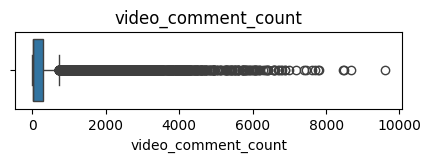

In [51]:
plt.figure(figsize=(5,1))
plt.title('video_comment_count')
sns.boxplot(x=data['video_comment_count'])

Text(0.5, 1.0, 'Video comment count histogram')

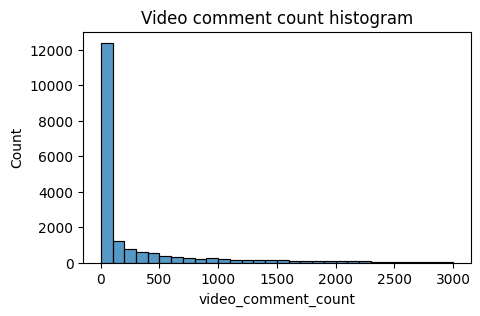

In [52]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_comment_count'], bins=range(0,(3001),100))
plt.title('Video comment count histogram')

**video_share_count**

<Axes: title={'center': 'video_share_count'}, xlabel='video_share_count'>

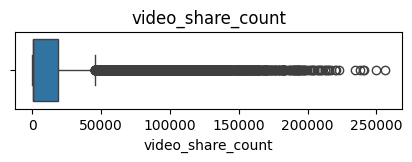

In [53]:
plt.figure(figsize=(5,1))
plt.title('video_share_count')
sns.boxplot(x=data['video_share_count'])

Text(0.5, 1.0, 'Video share count histogram')

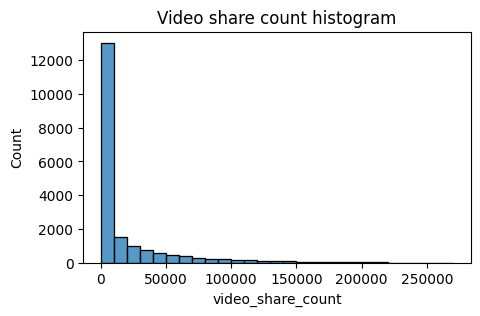

In [54]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_share_count'], bins=range(0,(270001),10000))
plt.title('Video share count histogram')

**video_download_count**

<Axes: title={'center': 'video_download_count'}, xlabel='video_download_count'>

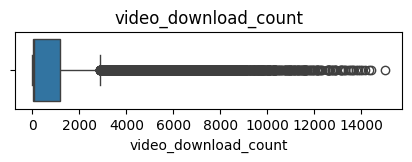

In [55]:
plt.figure(figsize=(5,1))
plt.title('video_download_count')
sns.boxplot(x=data['video_download_count'])

Text(0.5, 1.0, 'Video download count histogram')

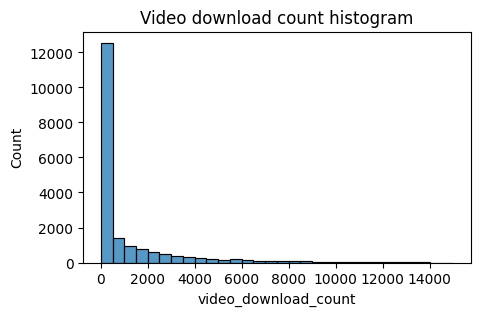

In [56]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_download_count'], bins=range(0,(15001),500))
plt.title('Video download count histogram')

Text(0.5, 1.0, 'Claims by verification status histogram')

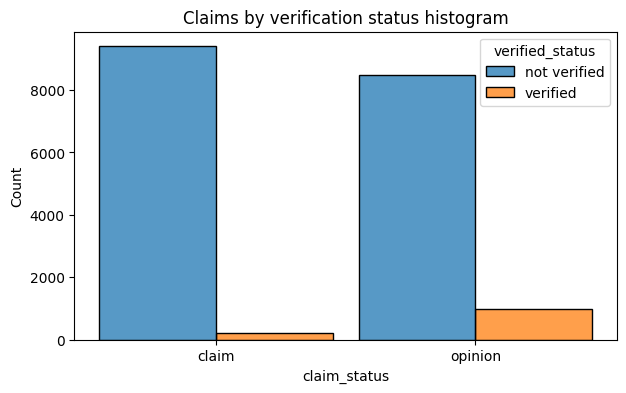

In [57]:
plt.figure(figsize=(7,4))
sns.histplot(data=data,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.9)
plt.title('Claims by verification status histogram')

There are far fewer verified users than unverified users, but if a user is verified, they are more likely to post opnions.

**Determine outliers**

In [58]:
cols = ['video_view_count','video_like_count','video_share_count','video_download_count','video_comment_count']

for col in cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    median = data[col].median()
    upper_boundary = median + 1.5*iqr

    outlier_count = (data[col] > upper_boundary).sum()
    print(f'Number of outliers, {col}:', outlier_count)

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


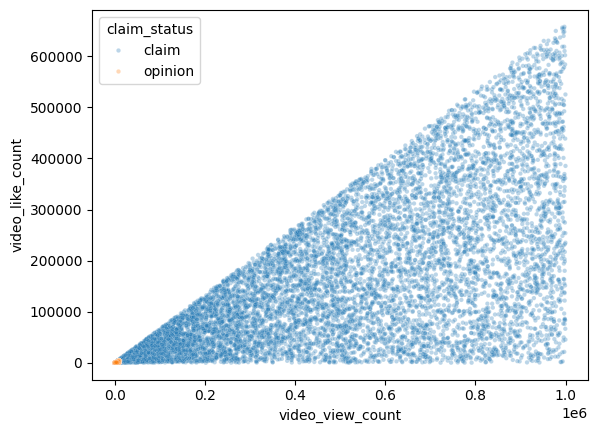

In [59]:
sns.scatterplot(x=data["video_view_count"], y=data["video_like_count"],
                hue=data["claim_status"], s=10, alpha=.3)
plt.show()

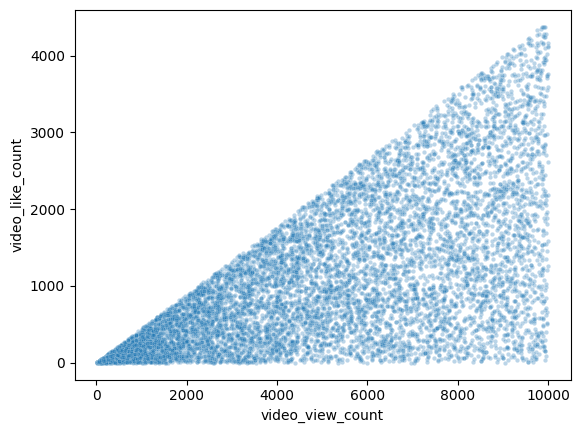

In [60]:
opinion = data[data['claim_status']=='opinion']
sns.scatterplot(x=opinion["video_view_count"], y=opinion["video_like_count"],
                 s=10, alpha=.3)
plt.show()

Now, use my statistical knowledge to analyze and interpret the claims classification data.
1. Are there statistical differences between verified and unverified accounts in terms of the mean video view counts?

In [61]:
verify_data = data.groupby('verified_status')['video_view_count'].mean()
verify_data

verified_status
not verified    265663.785339
verified         91439.164167
Name: video_view_count, dtype: float64

- Null hypothesis: 
There is no difference in number of views between Tiktok videos posted by both verified and unverified accounts, event occurs by chance.
- Alternative hypothesis:
The mean of not verified author has 48% more views than verified author.
- Significant level : 5%

In [62]:
significant_level = 0.05

# Save each sample in a variable
not_verified = data[data["verified_status"] == "not verified"]["video_view_count"]
verified = data[data["verified_status"] == "verified"]["video_view_count"]

# Implement a t-test using the two samples
stats.ttest_ind(a=not_verified, b=verified, equal_var=False)

TtestResult(statistic=25.499441780633777, pvalue=2.6088823687177823e-120, df=1571.163074387424)

Since the p-value is smaller than our significant level, so the null hypothesis is rejected. So, there is a statistically difference in the mean video view between the verified and unverified accounts on Tiktok

In [88]:
data['text_length'] = data["video_transcription_text"].apply(lambda row:len(row))

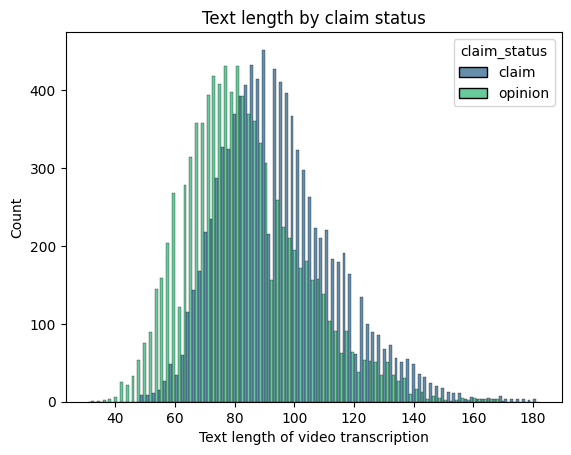

In [129]:
sns.histplot(data=data, x='text_length', stat='count', multiple='dodge',
             kde=False, hue='claim_status', palette='viridis', element='bars',
             legend=True)

plt.title('Text length by claim status')
plt.xlabel('Text length of video transcription')
plt.ylabel('Count')
plt.show()

In [63]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier

In [89]:
X = data.copy()

X = X.drop(columns=["#", "video_id"], axis=1)

X['claim_status'] = X['claim_status'].replace({'opinion': 0, 'claim': 1})

X = pd.get_dummies(X, 
                   columns=['verified_status','author_ban_status'],
                   drop_first=True)

X.head()

/var/folders/32/v798rz512835jj5s2_dh23rw0000gn/T/ipykernel_7067/2221700832.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['claim_status'] = X['claim_status'].replace({'opinion': 0, 'claim': 1})


,claim_status,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,1,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,1,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,1,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


In [90]:
y = X['claim_status']

X = X.drop(columns=['claim_status'], axis=1)

In [131]:
X.head()

,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


In [92]:
# This is the training and testing set for logistic regression model
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


# This is the training and validation set for logistic regression model
### Split the training data into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=10)

In [93]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((11450, 11), (3817, 11), (3817, 11), (11450,), (3817,), (3817,))

In [94]:
count_vec = CountVectorizer(ngram_range=(2, 3),
                            max_features=15,
                            stop_words='english')

count_vec

CountVectorizer(max_features=15, ngram_range=(2, 3), stop_words='english')

In [95]:
count_data = count_vec.fit_transform(X_train['video_transcription_text'])

count_df = pd.DataFrame(data=count_data.toarray(), columns=count_vec.get_feature_names_out())

count_df.head()

,colleague learned,colleague read,discovered tv,discussion board,friend learned,friend read,internet forum,learned internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
X_train_final = pd.concat([X_train.drop(columns=['video_transcription_text'], axis=1).reset_index(drop=True), count_df], axis=1)

X_train_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend read,internet forum,learned internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,27,749936.0,98243.0,17149.0,1580.0,627.0,97,False,False,False,...,0,0,0,0,0,0,0,0,1,0
1,44,8795.0,2936.0,172.0,9.0,0.0,76,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,20,593281.0,332025.0,103892.0,7769.0,2486.0,87,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,19,102989.0,18166.0,7053.0,322.0,163.0,92,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,15,7358.0,1307.0,173.0,32.0,9.0,71,True,False,False,...,0,0,0,0,0,0,0,0,0,0


In [97]:
validation_count_data = count_vec.transform(X_val['video_transcription_text'])

validation_count_table = pd.DataFrame(data=validation_count_data.toarray(),
                                      columns=count_vec.get_feature_names_out())

X_val_final = pd.concat([X_val.drop(columns=['video_transcription_text'], axis=1).reset_index(drop=True), validation_count_table], axis=1)

X_val_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend read,internet forum,learned internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,9,746054.0,298085.0,3138.0,1490.0,811.0,88,False,False,False,...,0,0,0,0,0,0,0,0,1,0
1,14,493761.0,128240.0,46503.0,1576.0,343.0,99,False,False,False,...,0,0,0,1,1,0,0,0,0,0
2,54,2284.0,787.0,116.0,14.0,4.0,53,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,21,370697.0,183727.0,33336.0,3981.0,336.0,83,False,True,False,...,1,0,0,0,0,0,0,0,1,0
4,5,111101.0,3832.0,769.0,57.0,21.0,88,False,False,False,...,1,0,0,0,0,0,0,0,0,0


In [99]:
X_test_count_data = count_vec.transform(X_test['video_transcription_text'])

X_test_count_table = pd.DataFrame(data=X_test_count_data.toarray(),
                                  columns=count_vec.get_feature_names_out())

X_test_final = pd.concat([X_test.drop(columns=['video_transcription_text'], axis=1).reset_index(drop=True), X_test_count_table], axis=1)

X_test_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend read,internet forum,learned internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,58,168172.0,85946.0,18049.0,1466.0,294.0,101,False,False,True,...,1,0,0,0,0,0,0,0,1,0
1,41,849.0,53.0,15.0,1.0,0.0,74,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,54,652446.0,24987.0,8505.0,86.0,16.0,88,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,53,9655.0,4143.0,44.0,74.0,14.0,76,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,34,9051.0,2474.0,538.0,6.0,0.0,89,True,False,False,...,0,0,0,0,0,0,0,0,0,0


In [101]:
X_train_final.shape, X_val_final.shape, X_test_final.shape

((11450, 25), (3817, 25), (3817, 25))

Build model
-

In [122]:
rf = RandomForestClassifier(random_state=10)

# A dictionary of hyperparameters to tune
cv_params = {'max_depth':[5, 7, None],
             'max_features':[0.3, 0.6],
             'max_samples':[0.7],
             'min_samples_leaf':[1,2],
             'min_samples_split':[2,3],
             'n_estimators':[75, 100, 200]}

scoring = ['precision_weighted', 'accuracy', 'f1_weighted', 'recall_weighted']


rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, 
                     refit='accuracy')

In [123]:
rf_cv.fit(X_train_final, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='accuracy',
             scoring=['precision_weighted', 'accuracy', 'f1_weighted',
                      'recall_weighted'])

In [125]:
rf_cv.best_score_

0.9979039301310044

In [130]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 0.3,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 75}

Evaluate validation data
-

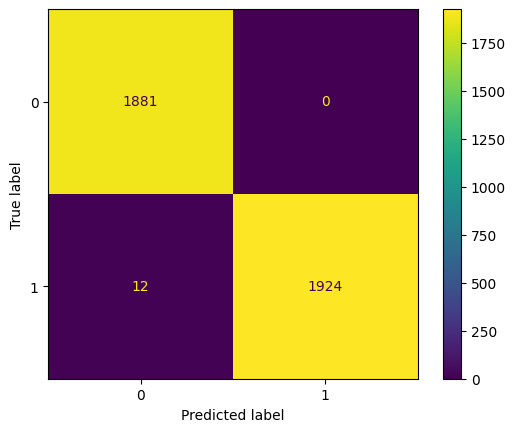

In [132]:
y_pred = rf_cv.predict(X_val_final)

rf_conf = confusion_matrix(y_val, y_pred)

rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_conf, display_labels=None)

rf_disp.plot()

plt.show()

In [133]:
print(classification_report(y_val, y_pred, target_names=['opinion','claim']))

              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1881
       claim       1.00      0.99      1.00      1936

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



Final step in predicting on test data
-

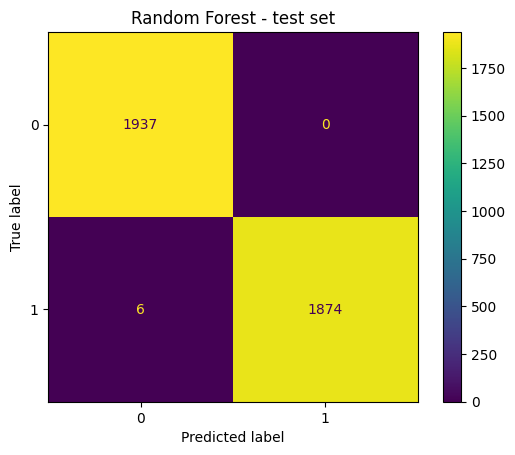

              precision    recall  f1-score   support

     opinion       1.00      1.00      1.00      1937
       claim       1.00      1.00      1.00      1880

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



In [137]:
y_pred = rf_cv.best_estimator_.predict(X_test_final)

rf_best_conf = confusion_matrix(y_test, y_pred)

rf_best_disp = ConfusionMatrixDisplay(confusion_matrix=rf_best_conf, display_labels=None)

rf_best_disp.plot()

plt.title('Random Forest - test set')
plt.show()

print(classification_report(y_test, y_pred, target_names=['opinion','claim']))

Feature Importance

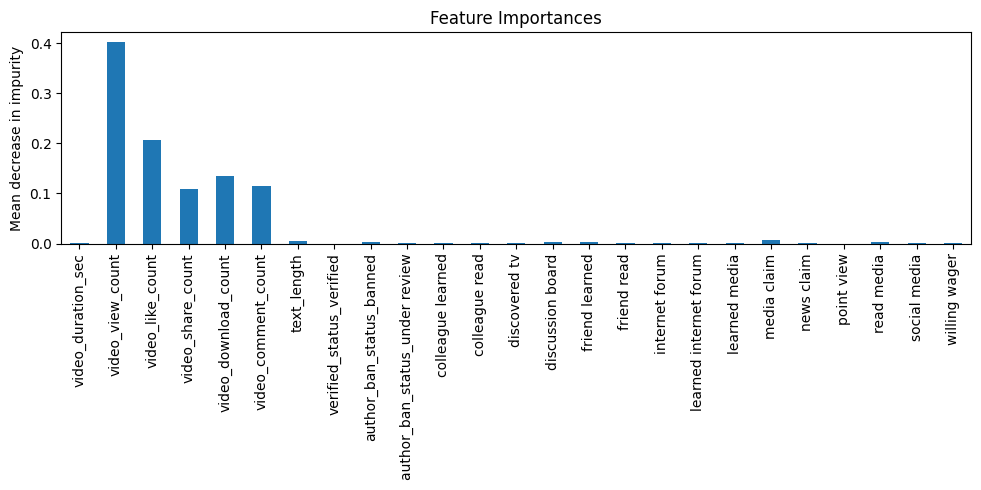

In [139]:
importances = rf_cv.best_estimator_.feature_importances_
importances_df = pd.Series(importances, index=X_train_final.columns)

fig, ax = plt.subplots(figsize=(10,5))
importances_df.plot.bar(ax=ax)
ax.set_title('Feature Importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

We can conclude that the claim status is related to engagement levels generated by video. 